Problem - 2:

### Hypothesis for ANOVA Tests:
#### Null hypothesis: The means of all the groups are equal.
#### Alternative hypothesis: At least mean of one group is differente

In [1]:
import numpy as np
from scipy.stats import f_oneway, shapiro, levene

def read_groups_from_file(filename):
    groups = [] 
    with open(filename, 'r') as file:
        lines = file.readlines()
        header = lines[0].strip()
        if any(char.isalpha() for char in header):
            lines = lines[1:] 
        
        data = [line.strip().split(",") for line in lines]
        
        data_array = np.array(data, dtype=float).T
        groups = [data_array[i] for i in range(data_array.shape[0])]
    
    return groups

groups = read_groups_from_file("group.txt")

anova_result = f_oneway(*groups)
print(f"Results of ANOVA :")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}\n")

Results of ANOVA :
F-statistic: 0.03533411578284486
p-value: 0.9652910418830514



### Conclusion According to the ANOVA test: 

F-statistic: 0.03533411578284486 and 
p-value: 0.9652910418830514

Since the p-value (𝑝=0.9653) is much greater than the significance level (𝛼=0.05), 
Null hypothesis is not rejected.

### To check whether the assumptions of ANOVA (Analysis of Variance) are satisfied, there are several steps:

#### 1. Independence: Ensured by the study design (randomization).
#### 2. Normality: Histograms, Q-Q plots, and statistical tests (e.g., Shapiro-Wilk).
#### 3. Homogeneity of variances: Levene’s test, boxplots, and residual plots.
#### 4. Equal sample sizes: Ideally. However, ANOVA is robust to moderate violations from it.

Results of Normality Check:
Group 1: Shapiro-Wilk Test Statistic = 0.9793770910401749, p-value = 0.5259991008252369
Group 1 is approximately normally distributed.

Group 2: Shapiro-Wilk Test Statistic = 0.980605959653044, p-value = 0.5777881137419237
Group 2 is approximately normally distributed.

Group 3: Shapiro-Wilk Test Statistic = 0.9742342004020553, p-value = 0.34104809476957937
Group 3 is approximately normally distributed.



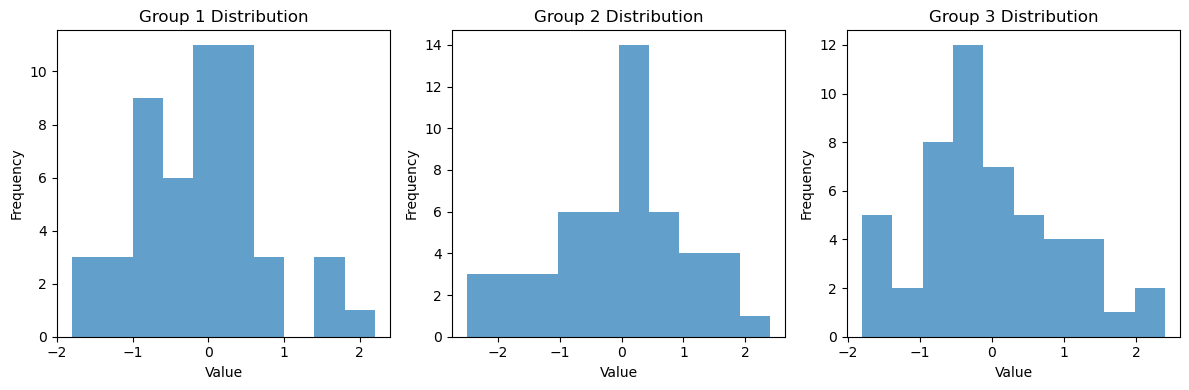

Levene's Test for Homogeneity of Variances:
Levene Statistic: 1.6200527847327568, p-value: 0.20140113675365784
Variances are approximately equal (satisfied).



In [2]:
import matplotlib.pyplot as plt
# Normality Check:
def normality_check(group, group_name):
    stat, p_value = shapiro(group)
    print(f"{group_name}: Shapiro-Wilk Test Statistic = {stat}, p-value = {p_value}")
    if p_value > 0.05:
        print(f"{group_name} is approximately normally distributed.\n")
    else:
        print(f"{group_name} is not normally distributed.\n")

print("Results of Normality Check:")
for i, group in enumerate(groups):
    normality_check(group, f"Group {i + 1}")

#  Visualize Data Distributions (Histogram)
plt.figure(figsize=(12, 4))

for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    plt.hist(group, bins=10, alpha=0.7)
    plt.title(f"Group {i + 1} Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Homogeneity Test:
levene_stat, levene_p = levene(*groups)
print(f"Levene's Test for Homogeneity of Variances:")
print(f"Levene Statistic: {levene_stat}, p-value: {levene_p}")
if levene_p > 0.05:
    print("Variances are approximately equal (satisfied).\n")
else:
    print("Variances are not equal (violated).\n")



### Assessment: 
#### 1.	Independence: Assumed to be satisfied.
#### 2.	Normality: Satisfied, as all groups are approximately normally distributed (Shapiro-Wilk test and histograms).
#### 3.	Homogeneity of Variances: Satisfied, as the variances of the three groups are approximately equal (Levene's test).
#### 4.	Equal sample sizes: Sample size is equal.
#### Since all assumptions of ANOVA are satisfied in this example, the results of the ANOVA test are valid and can be trusted.